<a href="https://colab.research.google.com/github/lanashin/Data_Analitycs2/blob/main/Unit%203%20-%20Python%20Advanced/Assignments/Unit3_Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [6]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [7]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [8]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [10]:
# Mean of all salaries
mean_salary = df['salary'].mean()
mean_salary

113706.45843828715

In [11]:
# Median of all salaries
median_salary =df['salary'].median()
median_salary

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [14]:
#double square braquets are important
new_df = df[['sex', 'salary']]
print(new_df)

      sex  salary
0    Male  139750
1    Male  173200
2    Male   79750
3    Male  115000
4    Male  141500
..    ...     ...
392  Male  103106
393  Male  150564
394  Male  101738
395  Male   95329
396  Male   81035

[397 rows x 2 columns]


Finding the Median salary for all males

In [16]:
male_median = (new_df[new_df['sex'] == 'Male']).median()
print(male_median.to_string())

salary    108043.0


Finding the Median salary for all females

In [17]:
female_median = (new_df[new_df['sex'] == 'Female']).median()
print(female_median.to_string())

salary    103750.0


Comparing the Mean salary of Males and Females

In [18]:
male_mean = (new_df[new_df['sex'] == 'Male']).mean()
print(male_mean.to_string())

salary    115090.418994


In [19]:
female_mean = (new_df[new_df['sex'] == 'Female']).mean()
print(female_mean.to_string())

salary    101002.410256


In [21]:
# The difference between mean salaries of male and female
diffrence = male_mean - female_mean
print(diffrence.to_string())

salary    14088.008738


# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [24]:
exper_salary = df[['yrs.service', 'salary']]
print(exper_salary)

     yrs.service  salary
0             18  139750
1             16  173200
2              3   79750
3             39  115000
4             41  141500
..           ...     ...
392           30  103106
393           19  150564
394           25  101738
395           15   95329
396            4   81035

[397 rows x 2 columns]


In [28]:
exper_20 = exper_salary[exper_salary['yrs.service'] >= 20]
print(exper_20.count())

yrs.service    157
salary         157
dtype: int64


In [29]:
print(exper_20.mean())

yrs.service        31.057325
salary         122520.656051
dtype: float64


Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [36]:
exper_less_20 = exper_salary[exper_salary['yrs.service']<20]
print((exper_less_20).mean())

yrs.service         8.820833
salary         107940.504167
dtype: float64


In [38]:
compare = exper_20.mean()[['salary']] - exper_less_20.mean()[['salary']]
print(compare.to_string())

salary    14580.151884


People who have salary of greater than or equal to 200,000

In [42]:
greater_200k  = exper_salary[exper_salary['salary'] >=200000]
print(greater_200k.count().to_string())

yrs.service    3
salary         3


Conclusion:
1. median salary in the company is: 107300, male's median salary 108043 (higher than median salary in company)
and female's salary in the company is 103750 (lower than median salry in the company). 
Thus, females make less money in the company. 

2. People that work on average 30 years make just about 10%  more than people that joined to the company less than 10 years ago.

3. There are just 3 people in the company making over 200,000.

4. There is a diffrence in the salary of males and females, males average salary is higher than females average salary by 14,088$.

5. The diffrence in average salary for people that worked over 20 years is 14,580$ higher than people that worked less than 20 years. 

# Rename values, subset columns, etc

In [43]:
clean_df = df
print(clean_df)

     Unnamed: 0      rank discipline  yrs.since.phd  yrs.service   sex  salary
0             1      Prof          B             19           18  Male  139750
1             2      Prof          B             20           16  Male  173200
2             3  AsstProf          B              4            3  Male   79750
3             4      Prof          B             45           39  Male  115000
4             5      Prof          B             40           41  Male  141500
..          ...       ...        ...            ...          ...   ...     ...
392         393      Prof          A             33           30  Male  103106
393         394      Prof          A             31           19  Male  150564
394         395      Prof          A             42           25  Male  101738
395         396      Prof          A             25           15  Male   95329
396         397  AsstProf          A              8            4  Male   81035

[397 rows x 7 columns]


# Create some simple visualizations showing some simple statistics

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

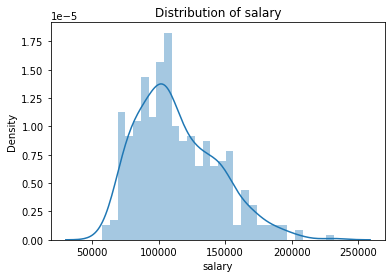

In [45]:
import seaborn as sns
sns.distplot(clean_df['salary'], bins = 30)
plt.title('Distribution of salary')
plt.show

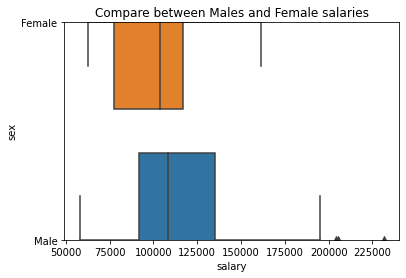

In [48]:
sns.boxplot(x = 'salary', y= 'sex', data = clean_df)
plt.ylim(0,1)
plt.title("Compare between Males and Female salaries")
plt.show()

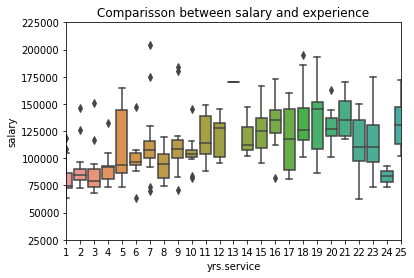

In [60]:
sns.boxplot(x = 'yrs.service', y = 'salary', data = exper_salary)
plt.ylim(25000, 225000)
plt.xlim(1,25)
plt.title('Comparisson between salary and experience')
plt.show()

Your observations from the visuals: 

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

You can see that males salary higher than females and also the bginning salary is higher than females (plot1).
2. People that make over 200k thwy work less than 10 years in the company, and people less than 5 years in the company make less than 150k.



